# <center><font color='red'>Prediction of Breast Cancer Diagnosis: benign or malignant</font></center>

In [63]:
# Required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.inspection import permutation_importance

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score


from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve

In [2]:
# Read a file with data.
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Get a main info about data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# All columns of dataset
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Checking columns with missing values.
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Sum of missing values.
sum_missing = data.isnull().T.any().T.sum()
print('Sum of missing data:', sum_missing)

Sum of missing data: 569


In [7]:
# Column with missing values.
missing_data = data.loc[:, data.isnull().any()].columns
print('Column with missing values:', missing_data)

Column with missing values: Index(['Unnamed: 32'], dtype='object')


In [8]:
# Remove columns (features) are not importance for further research,
# and a column with missing values ('Unnamed: 32').
# Importance features was chosen by SelectFromModel method.

# data_new = data.drop(['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
#        'area_mean', 'smoothness_mean', 'concavity_mean',
#        'symmetry_mean',
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se',
#        'compactness_se',  'symmetry_se',
#         'radius_worst', 'texture_worst',
#        'perimeter_worst', 'area_worst', 'smoothness_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'Unnamed: 32'], axis=1)
# data_new


data_new = data.drop(['id', 'Unnamed: 32'], axis=1)
data_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# Checking duplicates in the dataset.
print('Number of duplicates:', data_new.duplicated().sum())

Number of duplicates: 0


In [10]:
# Main description.
data_new.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# Checking columns with missing values.
data_new.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
# Short info after deleted two column.
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
print("The unique number of data values are")
data_new.nunique()

The unique number of data values are


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [14]:
# Number of values.
data_new["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

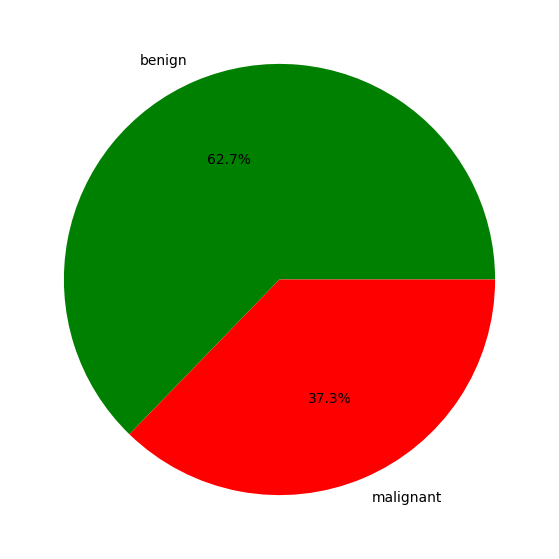

In [15]:
# Displaying of percentage of diagnos.
labels = 'benign', 'malignant'
colors = 'green', 'red'

fig = plt.figure(figsize =(10, 7))
plt.pie(data_new["diagnosis"].value_counts(),
        colors=colors,
        labels=labels, autopct='%1.1f%%')

# show plot
plt.show()

In [16]:
# Making correlation with standard correlation coefficient 'pearson'.
get_corr_1 = data_new.corr(method='pearson')
get_corr_1.style.background_gradient()

<ipython-input-16-6778bfba7e05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  get_corr_1 = data_new.corr(method='pearson')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

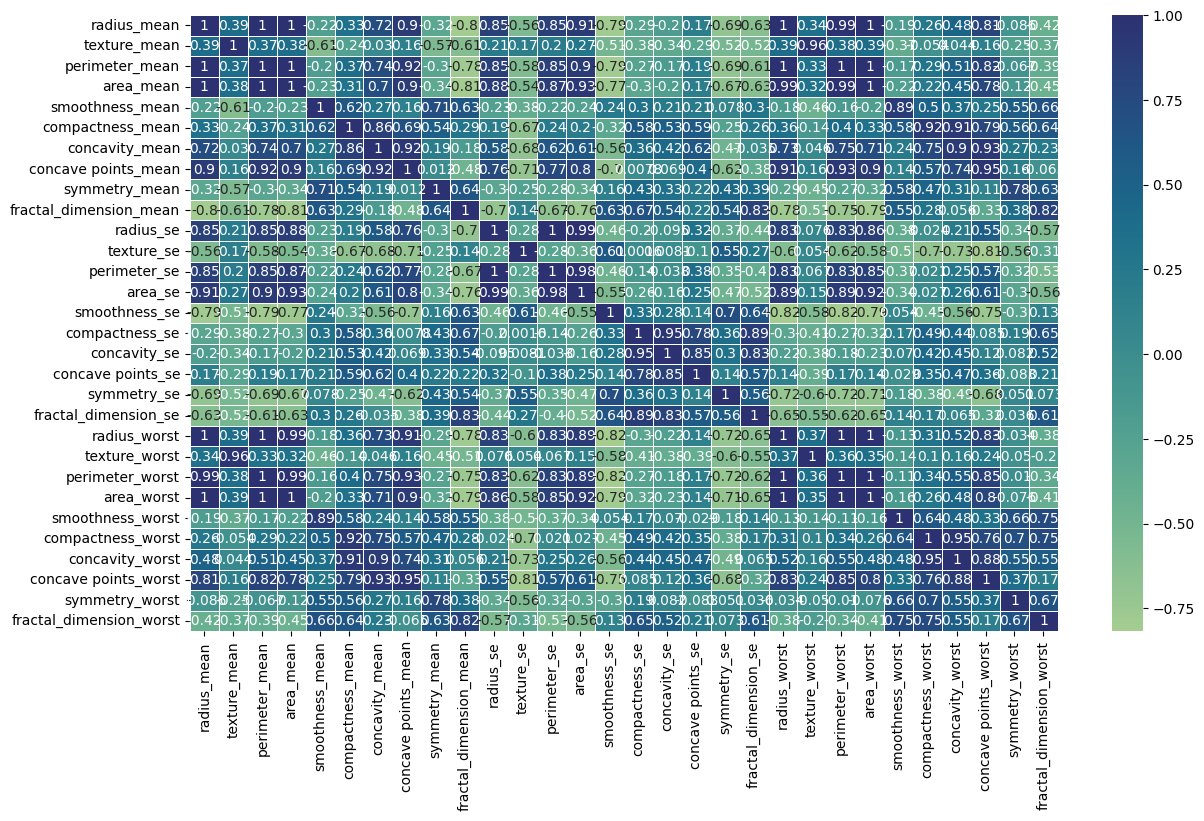

In [17]:
# Visualisation correlation.
corr_1 = get_corr_1.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_1, annot=True, linewidth=.6, cmap='crest')

In [ ]:
# for column_1 in ['compactness_mean', 'concave points_mean', 'fractal_dimension_mean',
#                'smoothness_se', 'concavity_se', 'concave points_se',
#                'fractal_dimension_se', 'fractal_dimension_worst']:
#     sns.barplot(x="diagnosis", y=column_1, data=data_new)
#     plt.title(f'{column_1} Distribution')
#     plt.show()

In [18]:
# Extraction all columns from the dataset.

column = []

for col in data_new.columns:
  column.append(col)
column

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [19]:
# To convert categorical column 'diagnosis' into numerical ones 0, 1
# so that they can be fitted by ML models which only take numerical data.
lab_enc = LabelEncoder()
for column_2 in ['diagnosis']:
                 data_new[column_2] = lab_enc.fit_transform(data_new[column_2])


# for column_2 in ['diagnosis', 'compactness_mean', 'concave points_mean',
#                  'fractal_dimension_mean', 'smoothness_se', 'concavity_se',
#                  'concave points_se', 'fractal_dimension_se',
#                  'fractal_dimension_worst']:
#                  data_new[column_2] = lab_enc.fit_transform(data_new[column_2])
data_new



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
# Making correlation after transformed by LabelEncoder.
get_corr_2 = data_new.corr(method='pearson')
get_corr_2.style.background_gradient()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

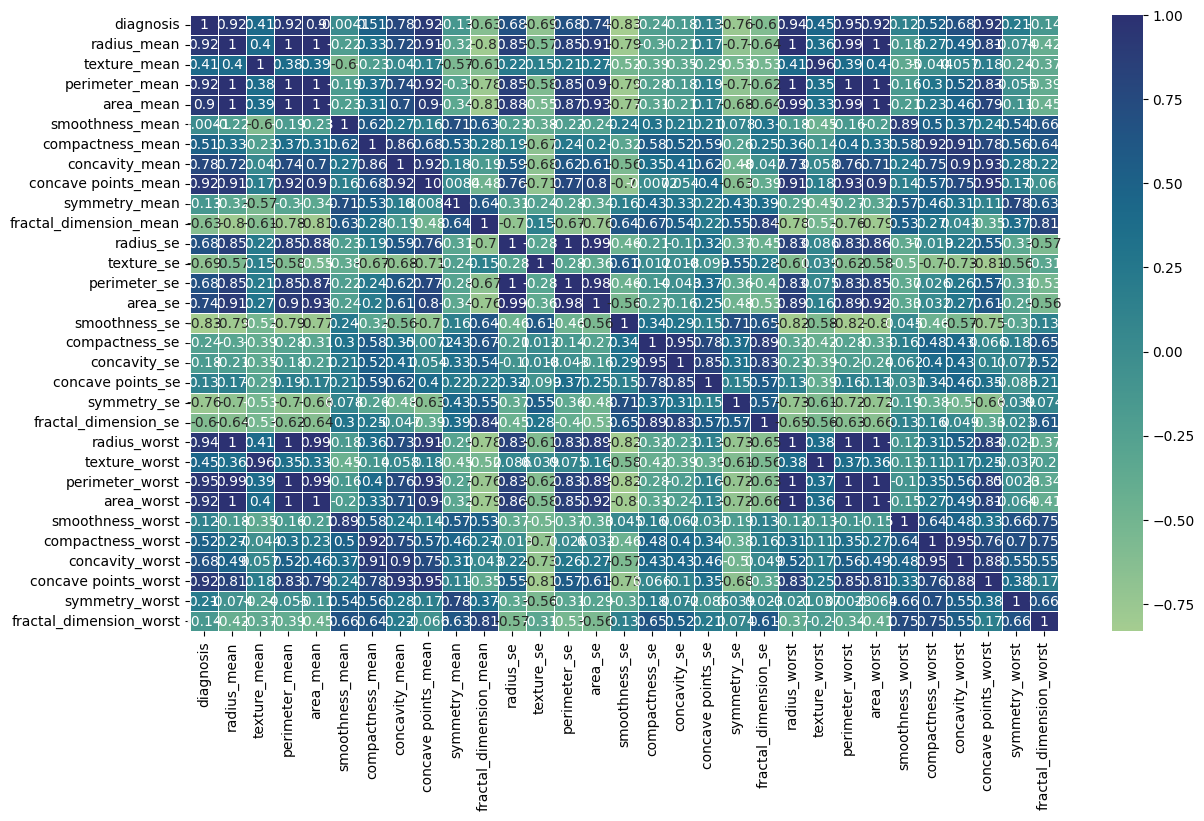

In [21]:
# Visualisation heatmap after transformed by LabelEncoder.
corr_2 = get_corr_2.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_2, annot=True, linewidth=.6, cmap='crest')

In [ ]:
# Data set standardization for removing the mean and scales each feature/variable to unit variance.
# for column_3 in ['diagnosis', 'compactness_mean', 'concave points_mean', 'fractal_dimension_mean',
#                'smoothness_se', 'concavity_se', 'concave points_se',
#                'fractal_dimension_se', 'fractal_dimension_worst']:
#                data_new[column_3] = StandardScaler().fit_transform(data_new[column_3].values.reshape(len(data_new), 1))

# data_new

In [22]:
# Splitting into X, y values.
X = data_new.drop("diagnosis", axis=1)

# Target value.
y = data_new["diagnosis"]

In [ ]:
# Feature selection with SelectFromModel.
# selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
# selector.estimator_.coef_

In [ ]:
# Importance features which was chosen by SelectFromModel method.
#X.columns[selector.get_support()]

In [ ]:
# total_values = len(selector.get_support())
# print('Total values:', total_values)

# sum_values = len(X.columns[selector.get_support()])
# print('Number of important values:', sum_values)

In [23]:
# Splitting into train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(398, 30)
(171, 30)
(398,)
(171,)


In [24]:
# Making Logistic Regression (LR) model
log_reg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
log_reg

LogisticRegression(max_iter=3000)

In [31]:
# Assuming 'X' contains features and 'y' contains labels.
scores = cross_val_score(log_reg, X, y, cv=5)  # 5-fold cross-validation.

print('Cross Validation Scores:', scores)
print('Average CV Score:', scores.mean())
print('Number of CV Scores used in Average:', len(scores))

Cross Validation Scores: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Average CV Score: 0.9507995652848935
Number of CV Scores used in Average: 5


In [32]:
# Get prediction.
y_pred = log_reg.predict(X_test)

In [33]:
# Creating a confusion matrix for defining the performance of a classification algorithm.
conf_matrx = confusion_matrix(y_test, y_pred)
conf_matrx

array([[106,   2],
       [  2,  61]])

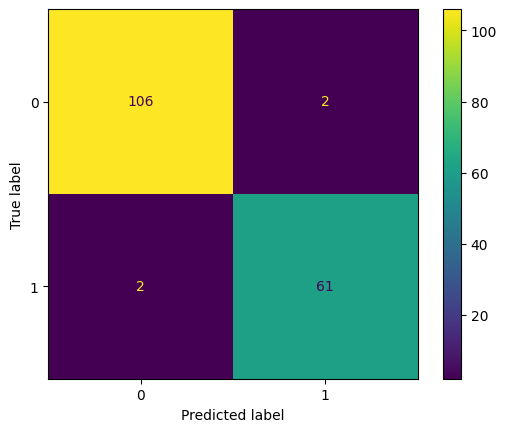

In [34]:
# Displaying of Confusion Matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrx)

disp.plot()

In [81]:
print('--- Logistic Regression measuring ---\n')

# Score of the train data.
train_score = log_reg.score(X_train, y_train)
print('Train Score: %.4f' % train_score)

# Score of the test data.
test_score = log_reg.score(X_test, y_test)
print('Test Score: %.4f' % test_score)

# Number of correct predictions over all predictions.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

# How many of the positive predictions made are correct (true positives).
precision = precision_score(y_test, y_pred)
print('Precision: %.4f' % precision)

# How many of the positive cases the model predicted.
recall = recall_score(y_test, y_pred)
print('Recall: %.4f' % recall)

# Combination precision and recall.
# Generally described as the harmonic mean of the two.
f1 = f1_score(y_test, y_pred)
print('F1: %.4f' % f1)

# How many negative predictions made are correct (true negatives)
specificity = specificity_score(y_test, y_pred)
print('Specificity: %.4f' % specificity)

--- Logistic Regression measuring ---

Train Score: 0.9598
Test Score: 0.9766
Accuracy: 0.9766
Precision: 0.9683
Recall: 0.9683
F1: 0.9683
Specificity: 0.9815


In [36]:
# The classification report.
print('--- Classification_report ---\n')
print(classification_report(y_test, y_pred))

--- Classification_report ---

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [65]:
# To avoid overfitting and control the complexity of the model:

# Using L2 regularization (Ridge regression).
ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Train score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Test score: {ridge.score(X_test, y_test):.2f}")

Ridge Train score: 0.74
Ridge Test score: 0.74


In [76]:
# Making AUC-ROC curve.
fpr, tpr, thresholds_1 = roc_curve(y_test, y_pred, pos_label=log_reg.classes_[1])
auc = roc_auc_score(y_test, y_pred)

In [77]:
# AUC Score.
auc = roc_auc_score(y_test, y_pred)
print('Score of AUC: %.3f' % auc)

Score of AUC: 0.975


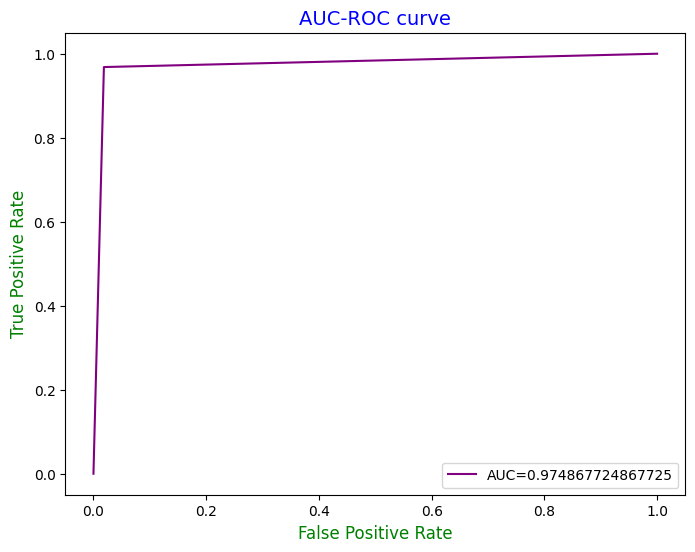

In [78]:
# Displaying AUC-ROC curve.
plt.figure(figsize=(8, 6))
plt.title('AUC-ROC curve', color='blue', fontsize=14)
plt.plot(fpr, tpr, color='purple', label='AUC=' + str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate', color='green', fontsize=12)
plt.ylabel('True Positive Rate', color='green', fontsize=12)
plt.show()

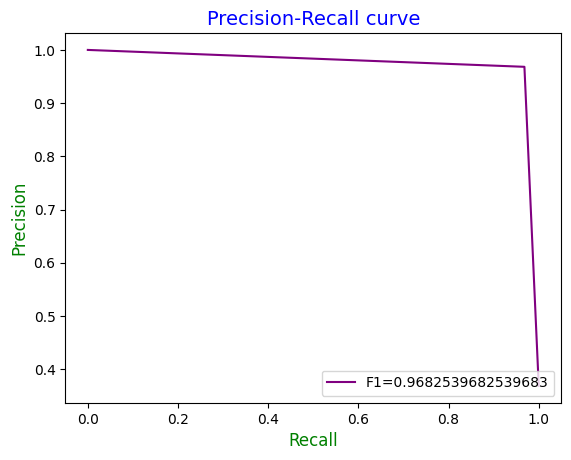

In [79]:
# Create precision-recall curve.
precision, recall, thresholds_2 = precision_recall_curve(y_test, y_pred)

# Create a subplot.
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label='F1=' + str(f1))
plt.legend(loc=4)

# Add axis labels to plot.
ax.set_title('Precision-Recall curve', color='blue', fontsize=14)
ax.set_ylabel('Precision', color='green', fontsize=12)
ax.set_xlabel('Recall', color='green', fontsize=12)

# Display plot.
plt.show()

# <center><font color='darkblue'>Conclusion</center></font>

In [82]:
# Initialize data of lists with scores.
data = {
    'Logistic Regression metrics':
     [f'{train_score:.3f}',
      f'{test_score:.3f}',
      f'{accuracy:.3f}',
      f'{precision:.3f}',
      f'{recall:.3f}',
      f'{f1:.3f}',
      f'{specificity:.3f}']
    }

# Creates pandas DataFrame.
df_compare = pd.DataFrame(data,
                          index=['Train Score',
                                 'Test Score',
                                 'Accuracy',
                                 'Precision',
                                 'Recall',
                                 'F1',
                                 'Specificity']
                          )

# Displaying the dataframe.
df_compare

,Logistic Regression metrics
Train Score,0.960
Test Score,0.977
Accuracy,0.977
Precision,0.968
Recall,0.968
F1,0.968
Specificity,0.981
